# Visualization Types for Prescriptive Outputs: Choosing the Right Tool

This notebook demonstrates three key visualization types for prescriptive analytics: Gantt charts, Sankey diagrams, and maps.

Understanding this is critical because:
- Different decision types require different visualization types
- Using the wrong type causes confusion
- Using the right type makes recommendations clear and actionable
- Effective visualization is essential for implementation


## Key Concepts

**Gantt Charts**: For time-based decisions
- Show when things should happen
- Ideal for scheduling, project planning
- Shows dependencies and timing relationships

**Sankey Diagrams**: For flow and allocation decisions
- Show how resources flow from sources to destinations
- Ideal for allocation, distribution, supply chains
- Width shows quantity/volume

**Maps**: For geographic and network decisions
- Show where things should happen
- Ideal for location, routing, network design
- Shows spatial relationships

**Critical insight**: Match the visualization type to the decision type for maximum clarity.


## Scenario: Three Different Decisions

You have three different prescriptive recommendations:
1. Staff scheduling (time-based)
2. Budget allocation (flow-based)
3. Warehouse location (geographic)

Each needs a different visualization type.


## Step 1: Install Required Packages (Colab)


In [1]:
# Install required packages (if needed in Colab)
%pip install numpy matplotlib pandas plotly -q



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


## Step 2: Import Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

np.random.seed(42)


## Step 3: Example 1 - Gantt Chart (Time-Based Decision)


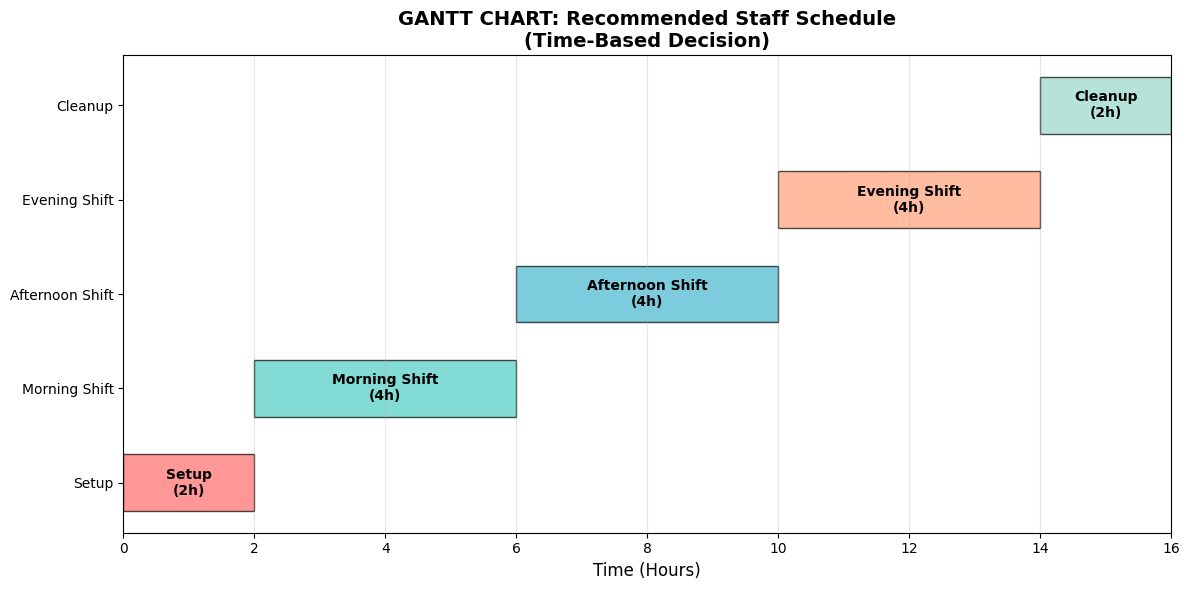

✅ Gantt Chart shows WHEN things should happen
   Perfect for scheduling and time-based decisions


In [3]:
# Gantt Chart: Staff scheduling recommendation
tasks = ['Setup', 'Morning Shift', 'Afternoon Shift', 'Evening Shift', 'Cleanup']
start_times = [0, 2, 6, 10, 14]  # Hours from start of day
durations = [2, 4, 4, 4, 2]

fig, ax = plt.subplots(figsize=(12, 6))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']

for i, (task, start, duration, color) in enumerate(zip(tasks, start_times, durations, colors)):
    ax.barh(i, duration, left=start, height=0.6, color=color, edgecolor='black', alpha=0.7)
    ax.text(start + duration/2, i, f'{task}\n({duration}h)', 
            ha='center', va='center', fontweight='bold', fontsize=10)

ax.set_yticks(range(len(tasks)))
ax.set_yticklabels(tasks)
ax.set_xlabel('Time (Hours)', fontsize=12)
ax.set_title('GANTT CHART: Recommended Staff Schedule\n(Time-Based Decision)', 
             fontsize=14, fontweight='bold')
ax.set_xlim(0, 16)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ Gantt Chart shows WHEN things should happen")
print("   Perfect for scheduling and time-based decisions")


## Step 4: Example 2 - Sankey Diagram (Flow/Allocation Decision)


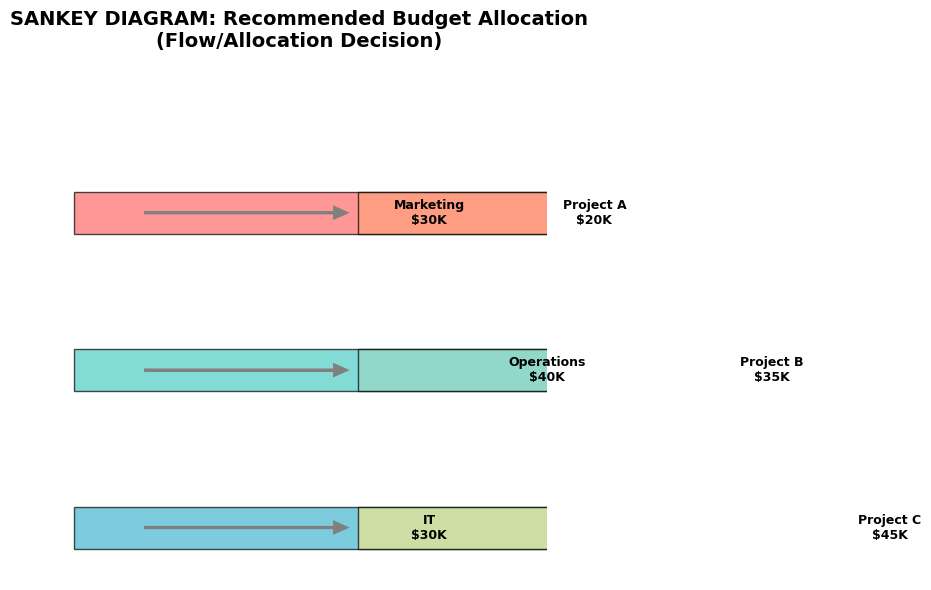

✅ Sankey Diagram shows HOW resources flow
   Perfect for allocation and distribution decisions


In [4]:
# Sankey Diagram: Budget allocation recommendation
# Simplified version using bars to show flow concept

fig, ax = plt.subplots(figsize=(12, 6))

# Sources (left)
sources = ['Marketing', 'Operations', 'IT']
source_values = [30, 40, 30]

# Destinations (right)  
destinations = ['Project A', 'Project B', 'Project C']
# Flows: Marketing→A: 20, Marketing→B: 10, Operations→B: 25, Operations→C: 15, IT→C: 30

# Draw sources
y_pos_sources = [0.7, 0.4, 0.1]
for i, (source, val, y) in enumerate(zip(sources, source_values, y_pos_sources)):
    ax.barh(y, val, left=0, height=0.08, color=['#FF6B6B', '#4ECDC4', '#45B7D1'][i], 
            edgecolor='black', alpha=0.7)
    ax.text(val/2, y, f'{source}\n${val}K', ha='center', va='center', 
            fontweight='bold', fontsize=9)

# Draw destinations
y_pos_dests = [0.7, 0.4, 0.1]
dest_values = [20, 35, 45]  # Total received
for i, (dest, val, y) in enumerate(zip(destinations, dest_values, y_pos_dests)):
    ax.barh(y, val, left=12, height=0.08, color=['#FFA07A', '#98D8C8', '#F0E68C'][i],
            edgecolor='black', alpha=0.7)
    ax.text(12 + val/2, y, f'{dest}\n${val}K', ha='center', va='center',
            fontweight='bold', fontsize=9)

# Draw flow arrows (simplified)
ax.arrow(3, 0.7, 8, 0, head_width=0.02, head_length=0.5, fc='gray', ec='gray', lw=2)
ax.arrow(3, 0.4, 8, 0, head_width=0.02, head_length=0.5, fc='gray', ec='gray', lw=2)
ax.arrow(3, 0.1, 8, 0, head_width=0.02, head_length=0.5, fc='gray', ec='gray', lw=2)

ax.set_xlim(-1, 20)
ax.set_ylim(0, 1)
ax.axis('off')
ax.set_title('SANKEY DIAGRAM: Recommended Budget Allocation\n(Flow/Allocation Decision)', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("✅ Sankey Diagram shows HOW resources flow")
print("   Perfect for allocation and distribution decisions")


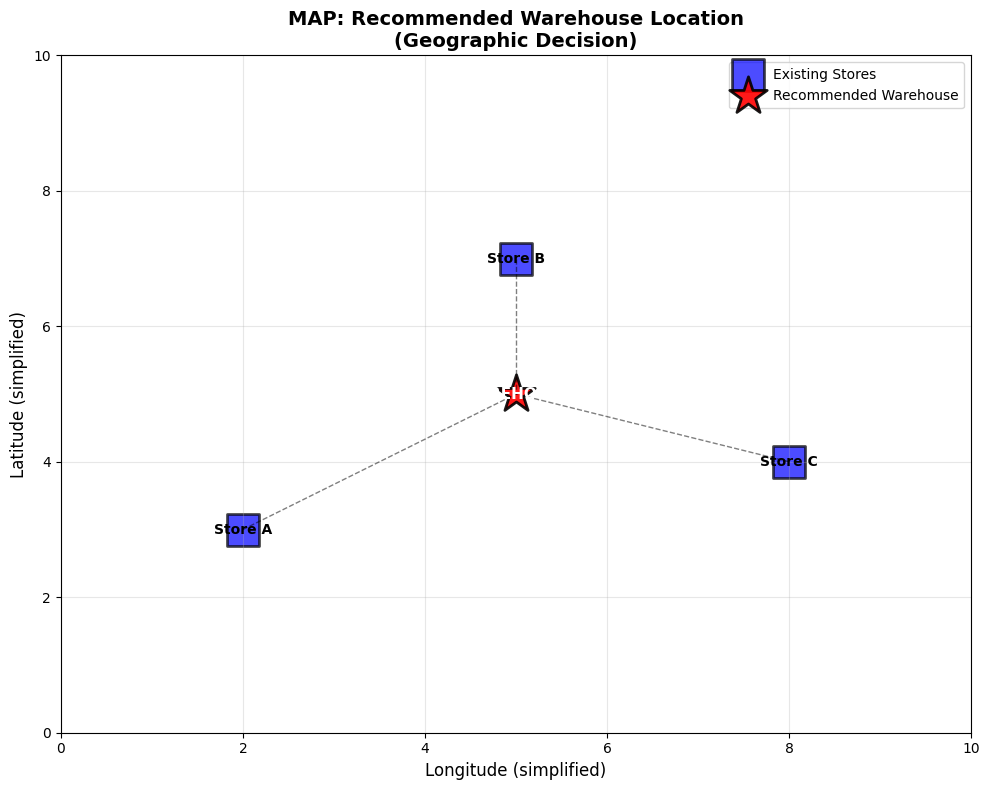

✅ Map shows WHERE things should happen
   Perfect for location and geographic decisions


In [5]:
# Map: Warehouse location recommendation
# Simplified version showing geographic relationships

fig, ax = plt.subplots(figsize=(10, 8))

# Existing locations
existing_x = [2, 5, 8]
existing_y = [3, 7, 4]
existing_labels = ['Store A', 'Store B', 'Store C']

# Recommended warehouse location
warehouse_x = 5
warehouse_y = 5

# Plot existing stores
ax.scatter(existing_x, existing_y, s=500, c='blue', marker='s', 
           edgecolors='black', linewidths=2, alpha=0.7, label='Existing Stores')
for x, y, label in zip(existing_x, existing_y, existing_labels):
    ax.text(x, y, label, ha='center', va='center', fontweight='bold', fontsize=10)

# Plot recommended warehouse
ax.scatter(warehouse_x, warehouse_y, s=800, c='red', marker='*', 
           edgecolors='black', linewidths=2, alpha=0.9, label='Recommended Warehouse')
ax.text(warehouse_x, warehouse_y, 'WAREHOUSE', ha='center', va='center', 
        fontweight='bold', fontsize=11, color='white')

# Draw connections
for x, y in zip(existing_x, existing_y):
    ax.plot([x, warehouse_x], [y, warehouse_y], 'k--', alpha=0.5, linewidth=1)

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_xlabel('Longitude (simplified)', fontsize=12)
ax.set_ylabel('Latitude (simplified)', fontsize=12)
ax.set_title('MAP: Recommended Warehouse Location\n(Geographic Decision)', 
             fontsize=14, fontweight='bold')
ax.legend(loc='upper right')
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ Map shows WHERE things should happen")
print("   Perfect for location and geographic decisions")


## Key Takeaways

1. **Match visualization to decision type**: Gantt for time, Sankey for flow, Map for location.

2. **Each type has strengths**: Gantt shows timing, Sankey shows allocation, Map shows geography.

3. **Using wrong type causes confusion**: Don't use a map for scheduling or a Gantt for allocation.

4. **Clear visualizations improve implementation**: Decision-makers understand and act on clear visualizations.

5. **Sometimes combine types**: Complex decisions may need multiple visualization types.

**Next steps**: In the next notebook, we'll learn about AI assistance in prescriptive analytics.
